In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px


In [2]:
# Dataset load

diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
5,1.52,Ideal,F,SI2,61.2,57.0,9057,7.45,7.39,4.54
6,1.01,Fair,H,VS2,65.2,56.0,3733,6.23,6.19,4.05
7,1.52,Ideal,J,VS1,62.3,58.0,8608,7.32,7.35,4.57
8,0.31,Ideal,H,VS1,61.8,54.2,557,4.33,4.37,2.69
9,1.14,Ideal,G,SI1,61.7,56.0,6741,6.71,6.75,4.15


In [3]:
# id: only for test & sample submission files, id for prediction sample identification
# cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal) 
# color: How colorless the diamond is, from J (worst) to D (best) 
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# carat: weight of the diamond
# price: price in USD
# x: length in mm
# y: width in mm
# z: depth in mm
# depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# table: width of top of diamond relative to widest point (43--95)

In [4]:
diamonds['volume'] = (diamonds['x'] * diamonds['y'] * diamonds['z']).round(2)
diamonds['x/y_ratio'] = (diamonds['x'] / diamonds['y']).round(2)
diamonds['t/d_ratio'] = (diamonds['table'] / diamonds['depth']).round(2)


In [5]:
def color(str_color):
    if str_color == 'D':
        return 'Colorless'
    elif str_color == 'E':
        return 'Colorless'
    elif str_color == 'F':
        return 'Colorless'
    else:
        return 'Near Colorless'

In [6]:
def clarity(str_clarity):
       
    if str_clarity == 'I1':
        return 'Included'
    
    elif str_clarity == 'SI1':
        return 'Slightly Included'
    
    elif str_clarity == 'SI2':
        return 'Slightly Included'
    
    elif str_clarity == 'VS1':
        return 'Very Slightly Included'
    
    elif str_clarity == 'VS2':
        return 'Very Slightly Included'
    
    elif str_clarity == 'VVS1':
        return 'Very Very Slightly Included'
    
    elif str_clarity == 'VVS2':
        return 'Very Very Slightly Included'

    else:
        return 'Internally Flawless'

In [7]:
diamonds['category_color'] = diamonds['color']
diamonds['category_color'] = diamonds['category_color'].apply(color)

diamonds['category_clarity'] = diamonds['clarity']
diamonds['category_clarity'] = diamonds['category_clarity'].apply(clarity)

diamonds.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,x/y_ratio,t/d_ratio,category_color,category_clarity
21227,2.14,Premium,G,SI2,60.4,59.0,17673,8.38,8.32,5.04,351.40,1.01,0.98,Near Colorless,Slightly Included
31856,0.58,Ideal,G,VVS1,61.3,56.0,2256,5.36,5.40,3.30,95.52,0.99,0.91,Near Colorless,Very Very Slightly Included
34810,1.20,Premium,G,VS2,59.6,58.0,7258,6.94,6.89,4.12,197.00,1.01,0.97,Near Colorless,Very Slightly Included
24124,0.30,Ideal,D,SI1,61.0,56.0,709,4.33,4.30,2.63,48.97,1.01,0.92,Colorless,Slightly Included
689,1.02,Ideal,G,VS1,61.0,57.0,7324,6.48,6.50,3.96,166.80,1.00,0.93,Near Colorless,Very Slightly Included
34320,1.08,Premium,H,VS1,58.6,60.0,5818,6.84,6.78,3.99,185.04,1.01,1.02,Near Colorless,Very Slightly Included
35293,0.50,Very Good,H,SI1,63.1,59.0,1181,5.02,4.96,3.15,78.43,1.01,0.94,Near Colorless,Slightly Included
12280,1.23,Very Good,D,SI1,59.7,58.0,7799,6.96,7.02,4.17,203.74,0.99,0.97,Colorless,Slightly Included
4922,0.43,Ideal,F,VVS2,62.2,55.0,1250,4.85,4.83,3.01,70.51,1.00,0.88,Colorless,Very Very Slightly Included
23881,1.10,Ideal,H,SI2,63.1,58.0,4725,6.54,6.53,4.12,175.95,1.00,0.92,Near Colorless,Slightly Included


In [8]:
diamonds.to_csv('../data/diamonds_train_2.csv', index = False)

In [9]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carat             40455 non-null  float64
 1   cut               40455 non-null  object 
 2   color             40455 non-null  object 
 3   clarity           40455 non-null  object 
 4   depth             40455 non-null  float64
 5   table             40455 non-null  float64
 6   price             40455 non-null  int64  
 7   x                 40455 non-null  float64
 8   y                 40455 non-null  float64
 9   z                 40455 non-null  float64
 10  volume            40455 non-null  float64
 11  x/y_ratio         40451 non-null  float64
 12  t/d_ratio         40455 non-null  float64
 13  category_color    40455 non-null  object 
 14  category_clarity  40455 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 4.6+ MB


In [10]:
diamonds.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797706,0.475544,0.20,0.40,0.70,1.040,4.50
depth,40455.0,61.752841,1.431725,43.00,61.00,61.80,62.500,79.00
table,40455.0,57.446133,2.233535,43.00,56.00,57.00,59.000,95.00
price,40455.0,3928.444469,3992.416147,326.00,945.00,2397.00,5331.000,18823.00
x,40455.0,5.729392,1.124453,0.00,4.71,5.69,6.540,10.23
y,40455.0,5.732819,1.146650,0.00,4.72,5.71,6.540,58.90
z,40455.0,3.537154,0.697062,0.00,2.91,3.52,4.035,8.06
volume,40455.0,129.802273,78.904003,0.00,64.89,114.69,170.840,3840.60
x/y_ratio,40451.0,0.999267,0.012970,0.00,0.99,1.00,1.010,1.62
t/d_ratio,40455.0,0.931042,0.048175,0.68,0.90,0.92,0.960,1.62


## Correlation Matrix

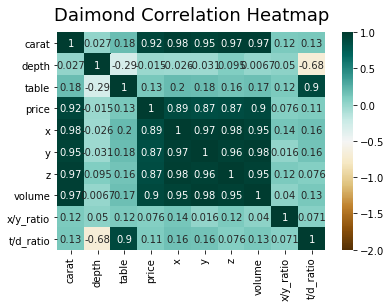

In [11]:
heatmap = sns.heatmap(diamonds.corr(), vmin=-2, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Daimond Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [12]:
cf.go_offline()

In [13]:
index_cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
index_color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
index_clarity = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


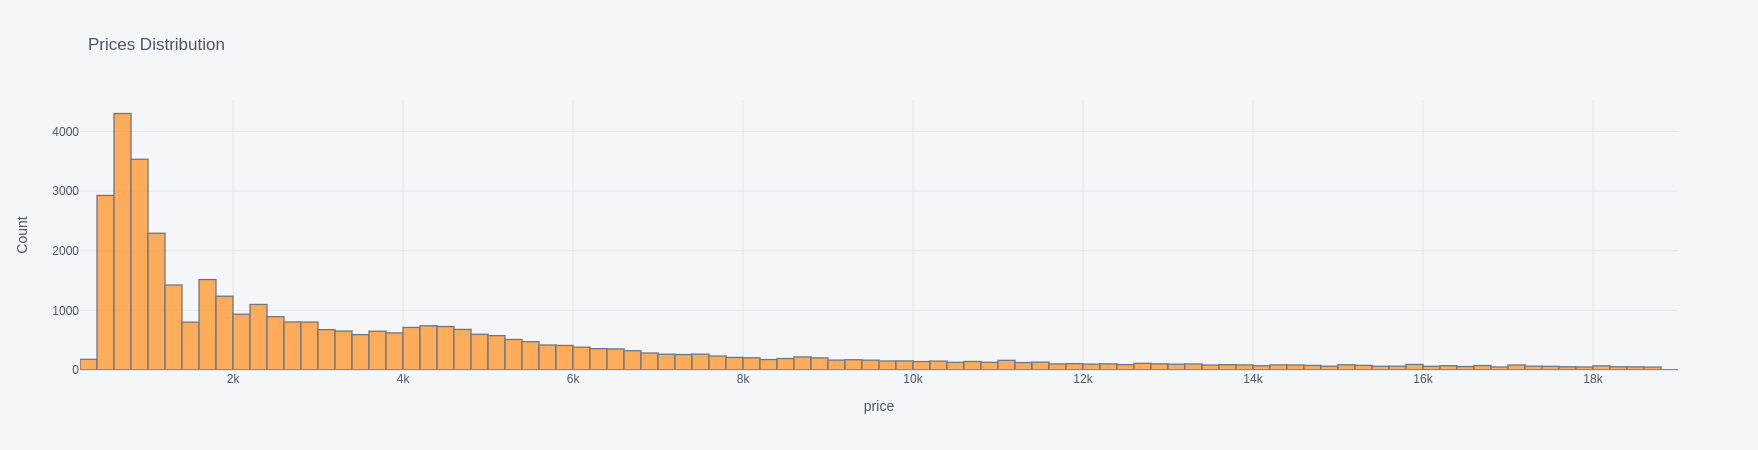

In [14]:
prices_distribution = diamonds['price'].iplot(kind='hist', title='Prices Distribution', yTitle='Count', xTitle='price')
prices_distribution

## Average Cut Prices

In [15]:
cut_price = diamonds[['cut', 'price']].groupby('cut', as_index=True).agg('mean').reindex(index_cut).round(1)

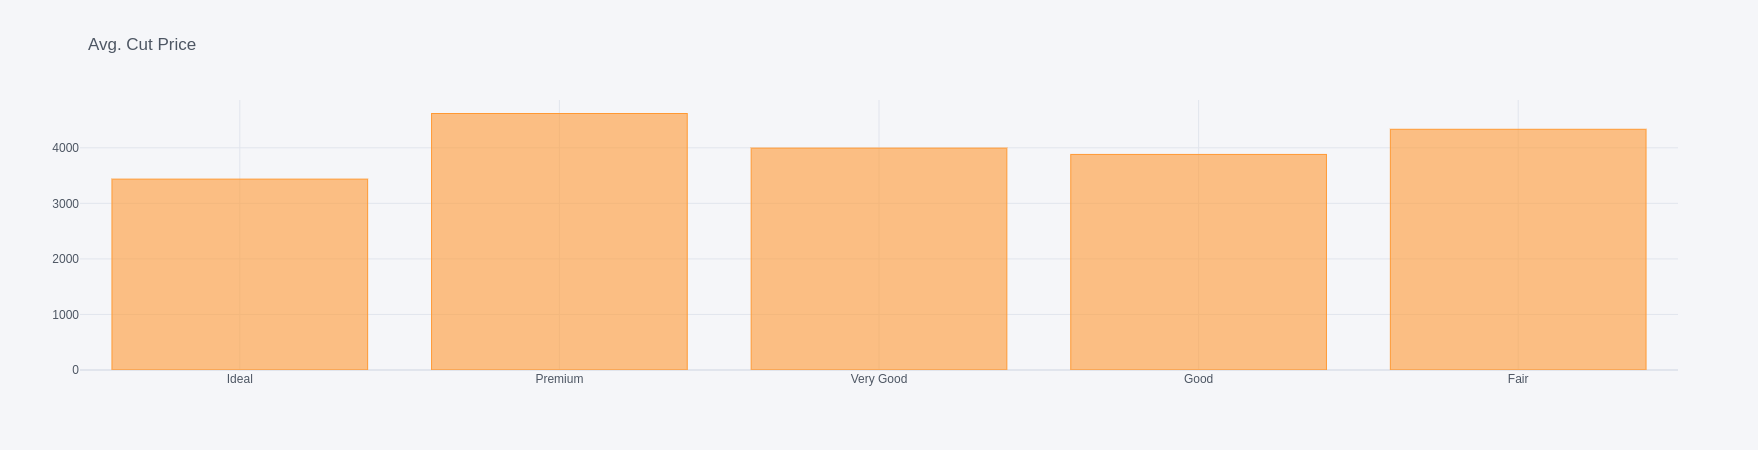

In [16]:
cut_price.iplot(kind='bar', 
               color= 'orange',  
               title = 'Avg. Cut Price', 
               fontsize = 14);

In [17]:
cut_carat = diamonds[['cut', 'carat']].groupby('cut', as_index=True).agg('mean').reindex(index_cut).round(1)

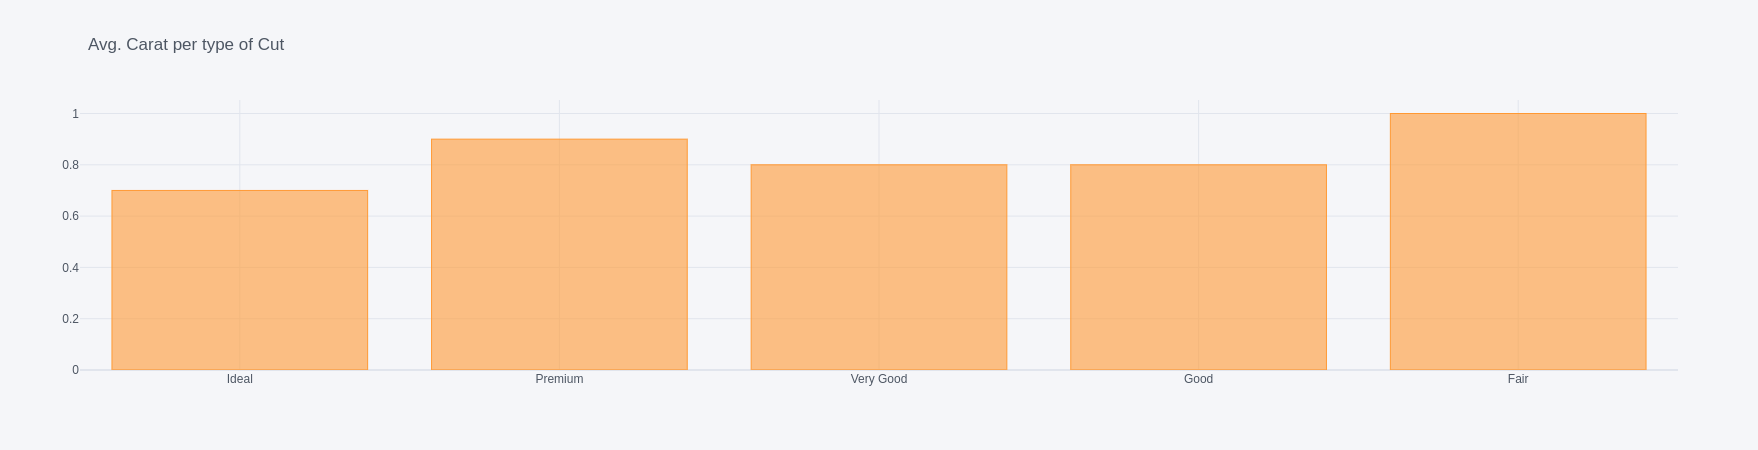

In [18]:
cut_carat.iplot(kind='bar', 
               color= 'orange',  
               title = 'Avg. Carat per type of Cut', 
               fontsize = 14);

## Average Color Prices

In [19]:
color_price = diamonds[['color', 'price']].groupby('color', as_index=True).agg('mean').reindex(index_color).round(1)

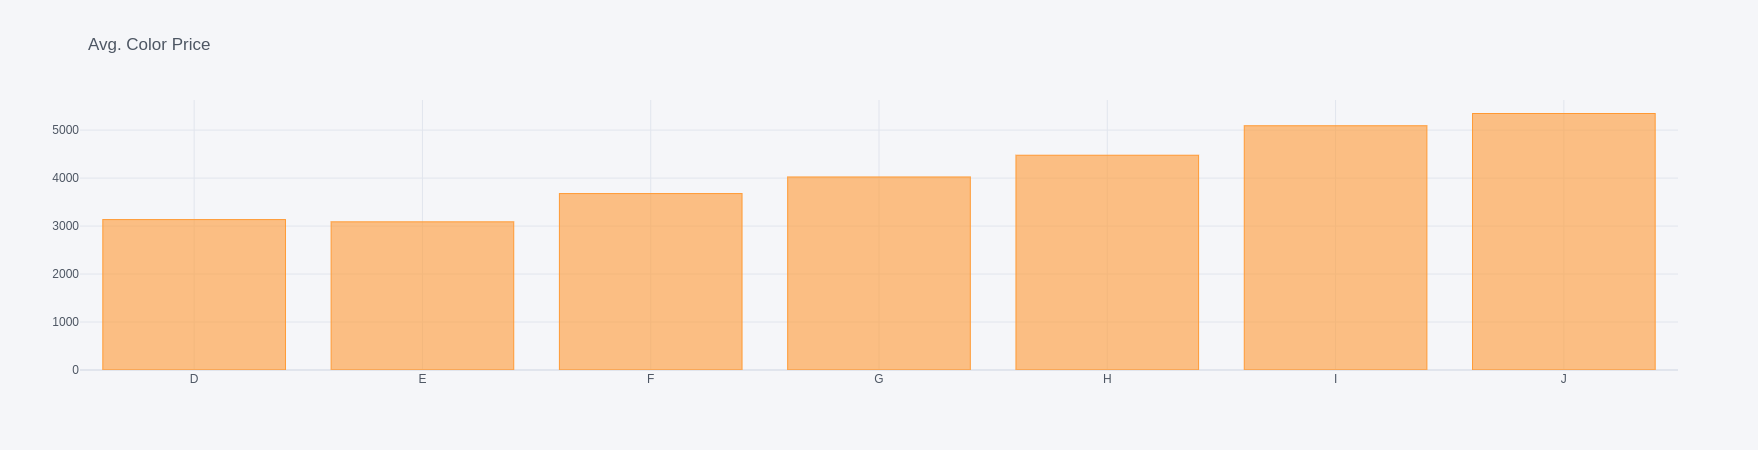

In [20]:
color_price.iplot(kind='bar', 
                  color= 'orange', 
                  title = 'Avg. Color Price', 
                  fontsize = 14);

In [21]:
color_carat = diamonds[['color', 'carat']].groupby('color', as_index=True).agg('mean').reindex(index_color).round(1)

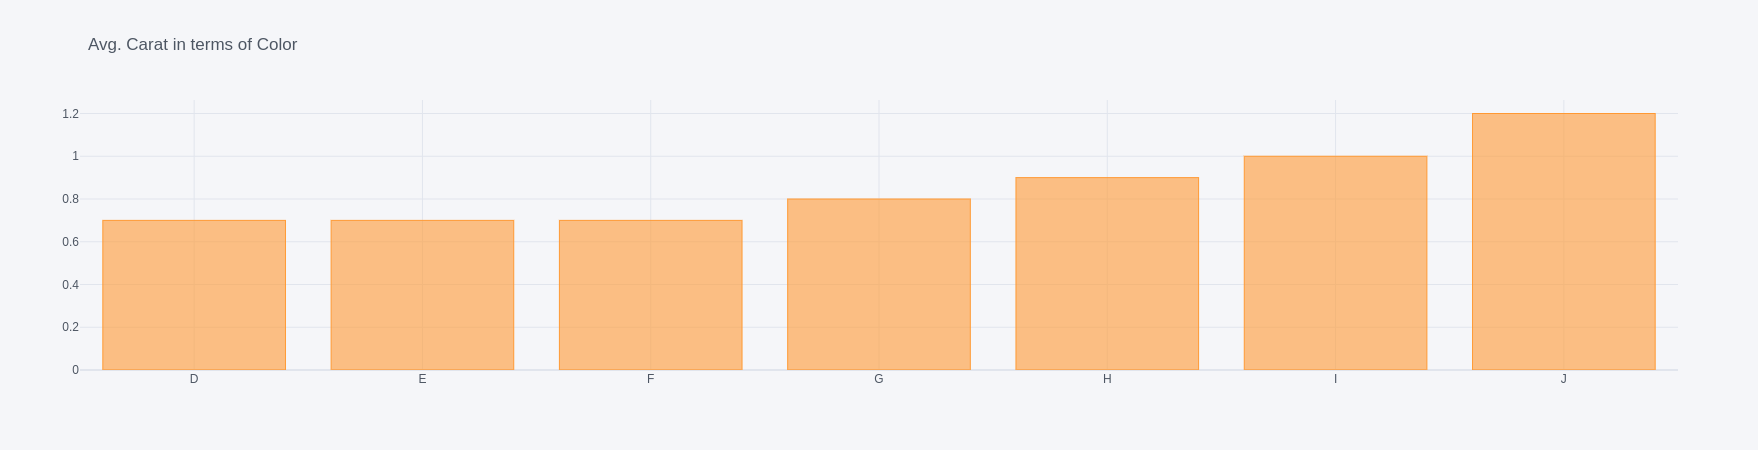

In [22]:
color_carat.iplot(kind='bar', 
                  color= 'orange', 
                  title = 'Avg. Carat in terms of Color', 
                  fontsize = 14);

In [23]:
category_color_price = diamonds[['category_color', 'price']].groupby('category_color', as_index=True).agg('mean').round(1)

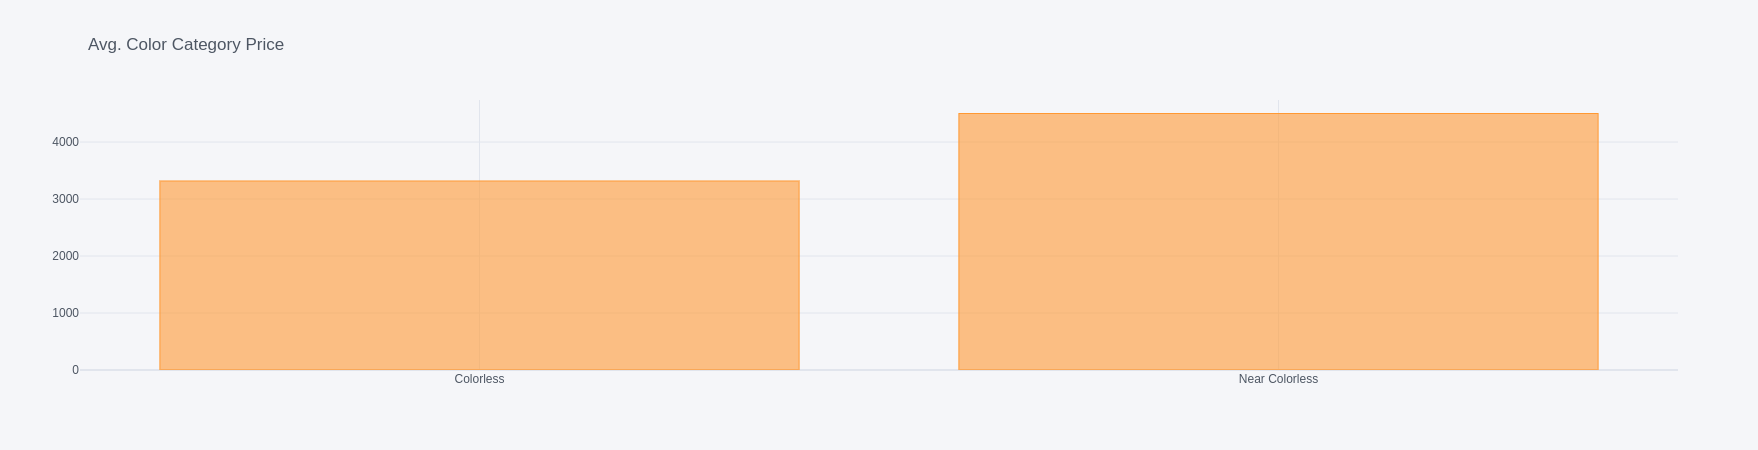

In [24]:
category_color_price.iplot(kind='bar', 
                          color= 'orange', 
                          title = 'Avg. Color Category Price', 
                          fontsize = 14);

## Average Clarity Prices

In [25]:
clarity_price = diamonds[['clarity', 'price']].groupby('clarity', as_index=True).agg('mean').reindex(index_clarity).round(1)

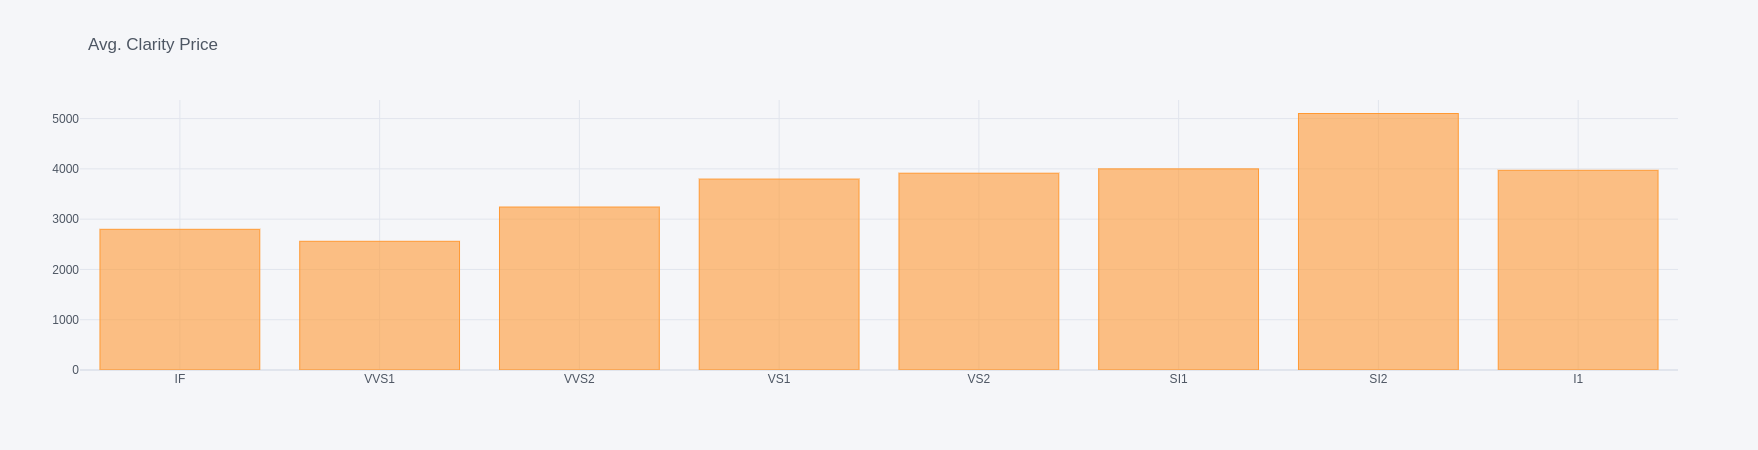

In [26]:
clarity_price.iplot(kind='bar', 
                    color= 'orange', 
                    title = 'Avg. Clarity Price', 
                    fontsize = 14);

In [27]:
calarity_carat = diamonds[['clarity', 'carat']].groupby('clarity', as_index=True).agg('mean').reindex(index_clarity).round(1)

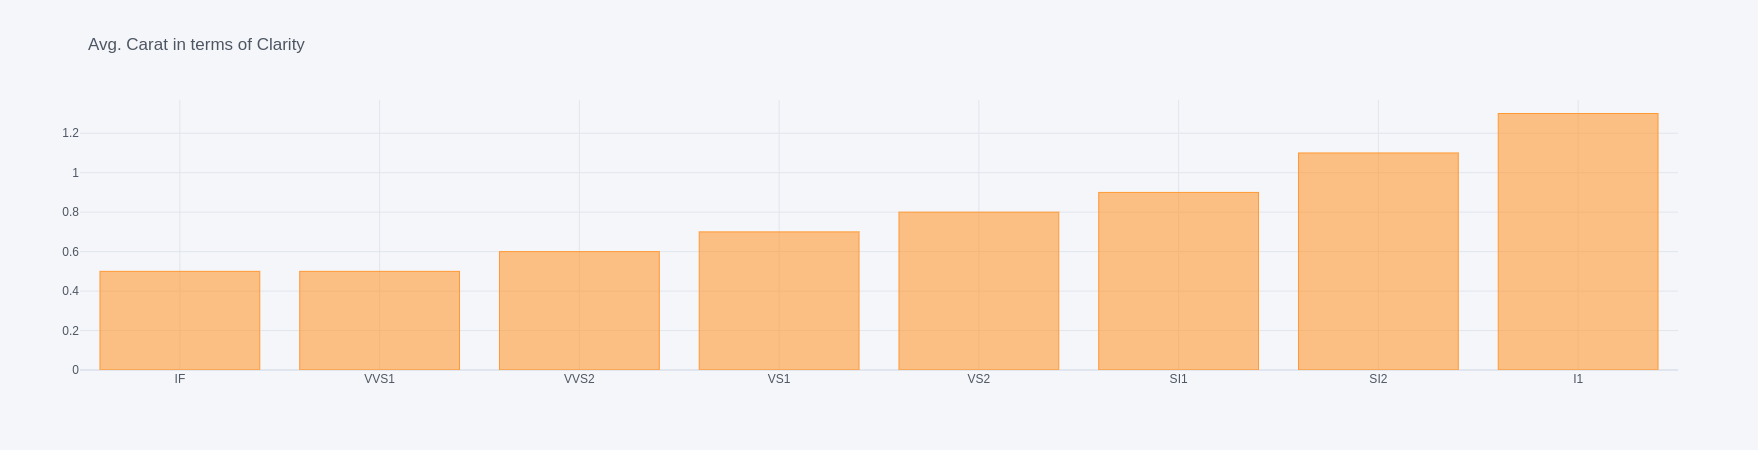

In [28]:
calarity_carat.iplot(kind='bar', 
                    color= 'orange', 
                    title = 'Avg. Carat in terms of Clarity', 
                    fontsize = 14);

## Correlation Carat & Price

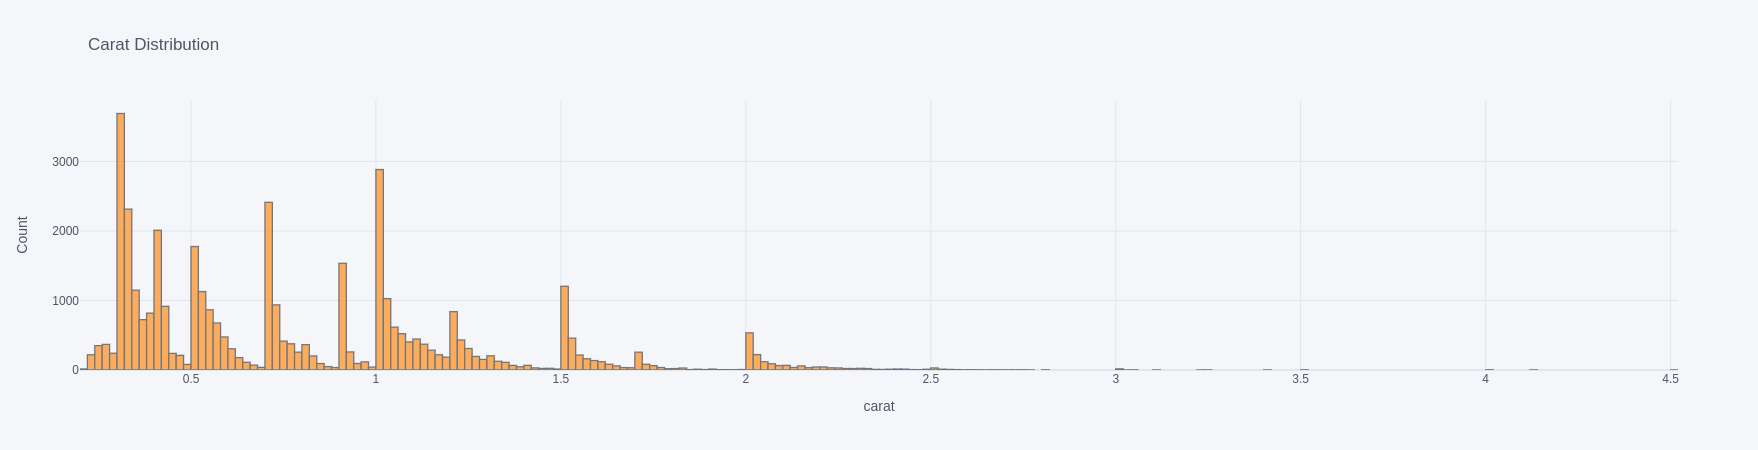

In [29]:
carat_distribution = diamonds['carat'].iplot(kind='hist', title='Carat Distribution', yTitle='Count', xTitle='carat')
carat_distribution

In [30]:
first_interval = diamonds['carat'].between(0, 1)
second_interval = diamonds['carat'].between(1, 1.5)
third_interval = diamonds['carat'].between(1.5, 2)
fourth_interval = diamonds['carat'].between(2, 2,5)
fifth_interval = diamonds['carat'].between(2.5, 4,5)


In [31]:
diamonds[second_interval]['category_color'].value_counts() / len(diamonds[second_interval]) * 100

Near Colorless    60.239427
Colorless         39.760573
Name: category_color, dtype: float64

In [32]:
diamonds[diamonds['carat'] == 2.57]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,x/y_ratio,t/d_ratio,category_color,category_clarity
869,2.57,Premium,D,SI2,58.9,58.0,17924,8.99,8.94,5.28,424.36,1.01,0.98,Colorless,Slightly Included
32278,2.57,Premium,J,SI1,63.0,58.0,18485,8.77,8.65,5.49,416.47,1.01,0.92,Near Colorless,Slightly Included
38805,2.57,Premium,E,SI2,61.3,60.0,17116,8.82,8.73,5.38,414.25,1.01,0.98,Colorless,Slightly Included


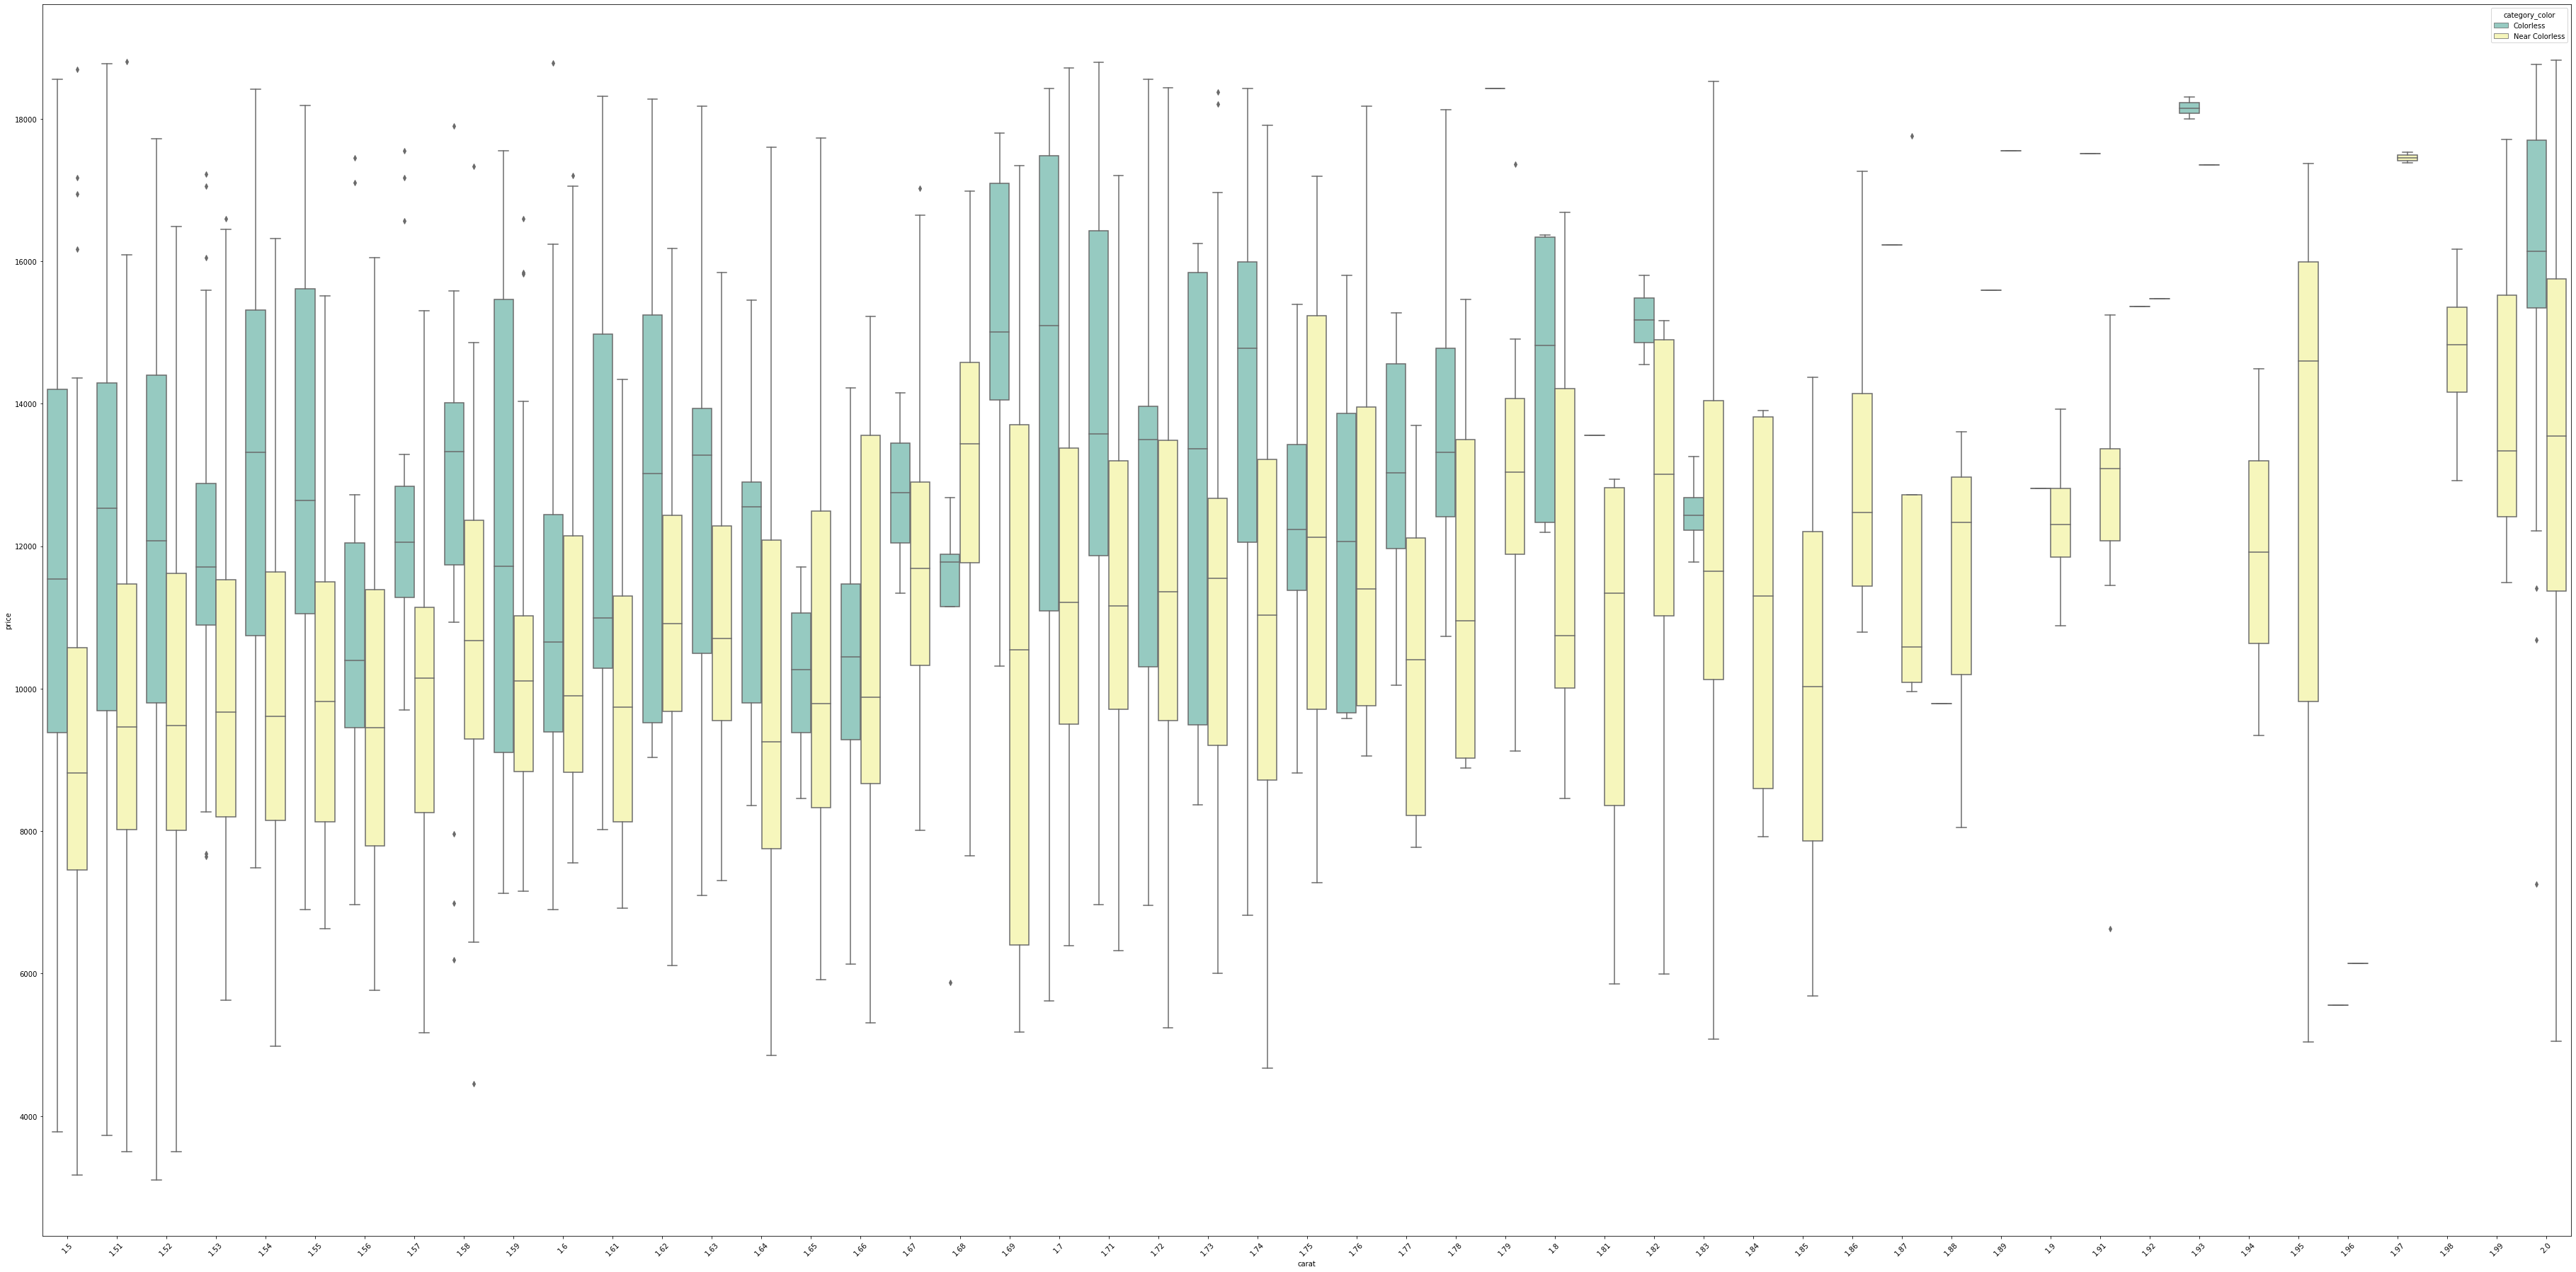

In [33]:
fig = plt.figure(figsize=(64, 32))
ax = sns.boxplot(hue='category_color', y='price', x='carat', data=diamonds[third_interval], palette='Set3');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

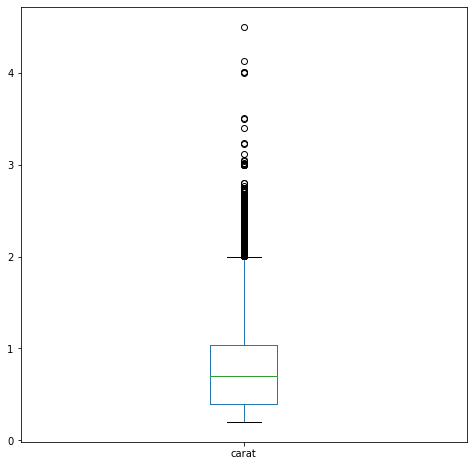

In [34]:
diamonds['carat'].plot(kind='box', figsize=(8,8));

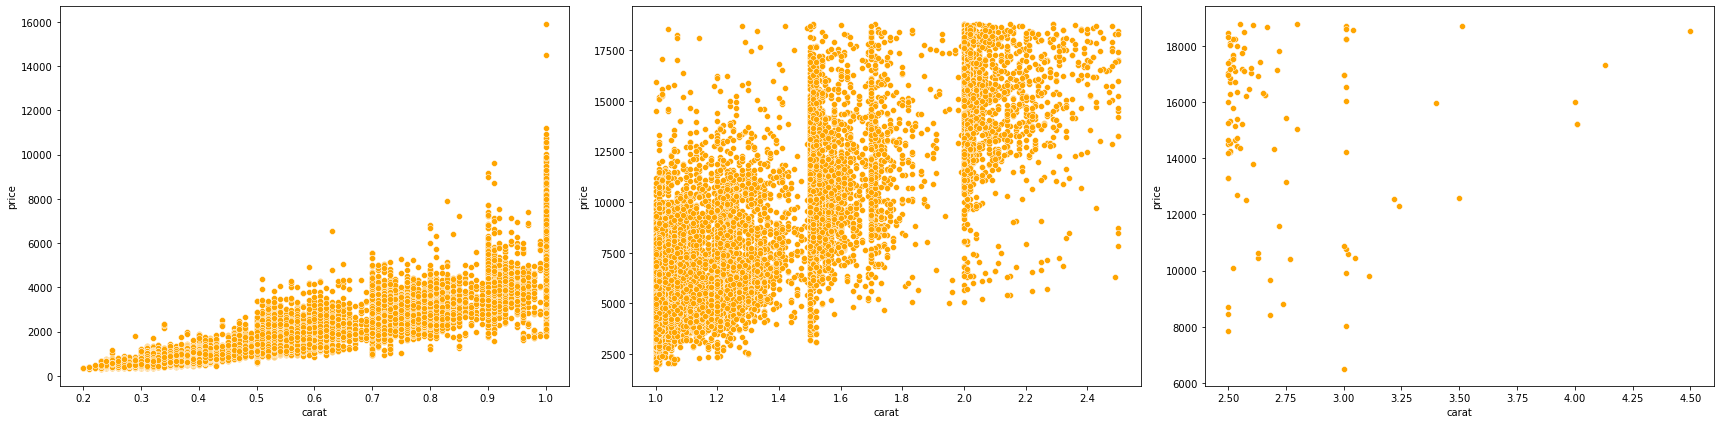

In [35]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.scatterplot(data=diamonds[diamonds['carat'].between(0, 1)], x='carat', y='price', color ='orange',  ax=axes[0]);
sns.scatterplot(data=diamonds[diamonds['carat'].between(1, 2.5)], x='carat', y='price', color ='orange', ax=axes[1]);
sns.scatterplot(data=diamonds[diamonds['carat'].between(2.5, 4.5)], x='carat', y='price', color ='orange',  ax=axes[2]);
plt.tight_layout()
plt.show()

## Correlation Table & Price

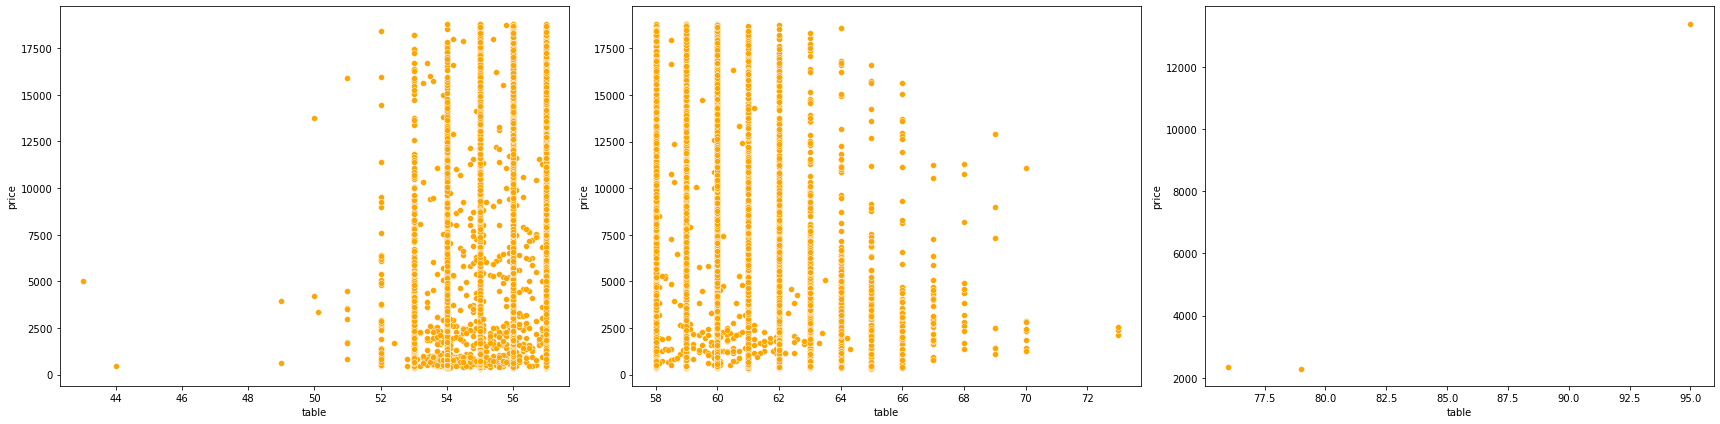

In [36]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.scatterplot(data=diamonds[diamonds['table'].between(43, 57)], x='table', y='price', color ='orange',  ax=axes[0]);
sns.scatterplot(data=diamonds[diamonds['table'].between(58, 75)], x='table', y='price', color ='orange', ax=axes[1]);
sns.scatterplot(data=diamonds[diamonds['table'].between(76, 95)], x='table', y='price', color ='orange',  ax=axes[2]);
plt.tight_layout()
plt.show()

## Correlation x,y,z & Price

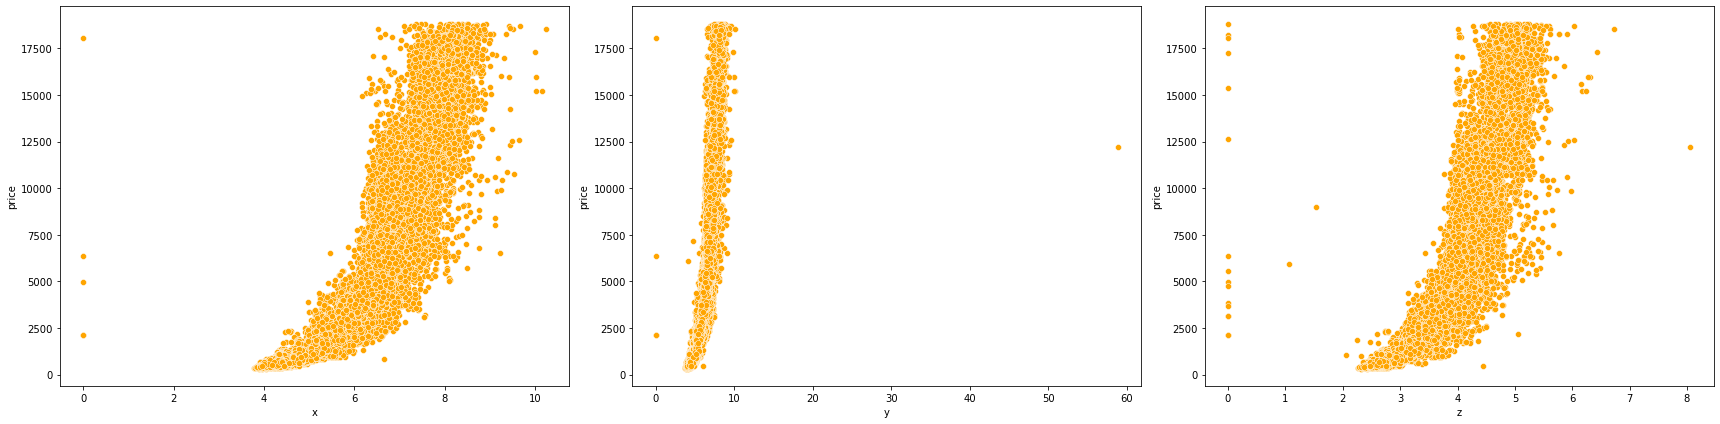

In [37]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.scatterplot(data=diamonds, x='x', y='price', color ='orange', ax=axes[0]);
sns.scatterplot(data=diamonds, x='y', y='price', color ='orange', ax=axes[1]);
sns.scatterplot(data=diamonds, x='z', y='price', color ='orange',  ax=axes[2]);



plt.tight_layout()
plt.show()

## Boxplot (prices)

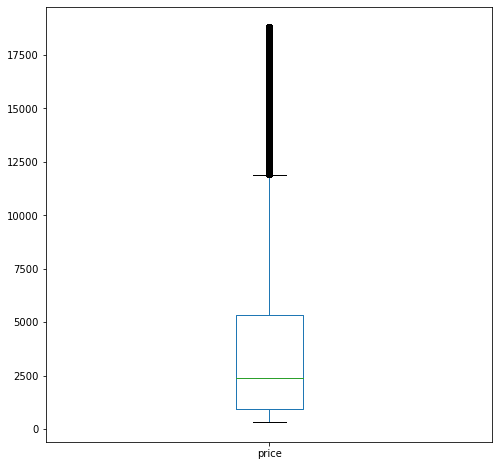

In [38]:
diamonds[['price']].clip(0, 19000).plot(kind='box', figsize=(8, 8));

## Highest Prices

In [39]:
highest_prices = diamonds[diamonds['price'].between(12500, 18823)]
numerics = ['int64','float64']
highest_prices.describe(include=numerics).T

,count,mean,std,min,25%,50%,75%,max
carat,2344.0,1.885823,0.358710,1.00,1.5500,2.01,2.0700,4.50
depth,2344.0,61.650981,1.475097,56.20,60.8000,61.80,62.6000,70.60
table,2344.0,57.978114,2.274529,50.00,56.0000,58.00,59.0000,95.00
price,2344.0,15318.385666,1812.217874,12500.00,13713.2500,15170.50,16858.0000,18823.00
x,2344.0,7.888212,0.535801,0.00,7.4800,8.02,8.2300,10.23
y,2344.0,7.878144,0.524269,0.00,7.4700,8.00,8.2100,10.16
z,2344.0,4.848814,0.400934,0.00,4.6000,4.93,5.0600,6.72
volume,2344.0,305.022159,59.419483,0.00,253.5275,320.60,338.9325,698.46
x/y_ratio,2343.0,1.001199,0.009878,0.97,0.9900,1.00,1.0100,1.12
t/d_ratio,2344.0,0.941310,0.050538,0.78,0.9100,0.94,0.9700,1.62


In [40]:
highest_prices['cut'].value_counts().reindex(index_cut) / len(highest_prices) * 100

Ideal        31.697952
Premium      36.646758
Very Good    21.373720
Good          7.380546
Fair          2.901024
Name: cut, dtype: float64

In [41]:

highest_prices['color'].value_counts().reindex(index_color) / len(highest_prices) * 100

D     7.039249
E    10.238908
F    14.590444
G    21.331058
H    18.046075
I    19.283276
J     9.470990
Name: color, dtype: float64

In [42]:
highest_prices['clarity'].value_counts().reindex(index_clarity) / len(highest_prices) * 100

IF       2.815700
VVS1     3.029010
VVS2     5.204778
VS1     13.011945
VS2     24.872014
SI1     21.715017
SI2     28.924915
I1       0.426621
Name: clarity, dtype: float64

## High Prices ( > 75 percentile)

In [43]:
high_prices = diamonds[diamonds['price'].between(5500, 12500)]
numerics = ['int64','float64']
high_prices.describe(include=numerics).T

,count,mean,std,min,25%,50%,75%,max
carat,7376.0,1.299475,0.283656,0.63,1.05,1.220,1.51,3.24
depth,7376.0,61.737771,1.447954,55.30,61.00,61.900,62.60,70.50
table,7376.0,57.735616,2.090885,52.00,56.00,58.000,59.00,70.00
price,7376.0,8134.242679,1964.638127,5500.00,6416.00,7703.000,9640.25,12500.00
x,7376.0,6.961354,0.491631,0.00,6.55,6.880,7.32,9.54
y,7376.0,6.962722,0.773974,0.00,6.56,6.880,7.32,58.90
z,7376.0,4.294868,0.318647,0.00,4.04,4.240,4.54,8.06
volume,7376.0,211.409799,62.119691,0.00,172.59,200.065,243.46,3840.60
x/y_ratio,7375.0,1.000747,0.017469,0.14,0.99,1.000,1.01,1.62
t/d_ratio,7376.0,0.935986,0.046065,0.77,0.91,0.930,0.96,1.21


In [44]:
high_prices['cut'].value_counts().reindex(index_cut) / len(high_prices) * 100

Ideal        34.747831
Premium      30.680586
Very Good    23.223970
Good          8.446312
Fair          2.901302
Name: cut, dtype: float64

In [45]:
high_prices['color'].value_counts().sort_index().reindex(index_color) / len(high_prices) * 100

D     8.717462
E    11.700108
F    15.780911
G    25.257592
H    18.777115
I    12.174620
J     7.592191
Name: color, dtype: float64

In [46]:
high_prices['clarity'].value_counts().reindex(index_clarity) / len(high_prices) * 100

IF       1.748915
VVS1     3.809653
VVS2     9.056399
VS1     17.719631
VS2     27.806399
SI1     22.247831
SI2     15.943601
I1       1.667570
Name: clarity, dtype: float64

## Medium-high Prices (percentile 50-75)

In [47]:
medium_high_prices = diamonds[diamonds['price'].between(2500, 5500)]
numerics = ['int64','float64']
medium_high_prices.describe(include=numerics).T

,count,mean,std,min,25%,50%,75%,max
carat,10051.0,0.925216,0.175628,0.44,0.76,0.92,1.02,2.15
depth,10051.0,61.848294,1.657381,43.00,61.00,61.90,62.70,79.00
table,10051.0,57.839021,2.315215,43.00,56.00,58.00,59.00,73.00
price,10051.0,3909.866381,861.682650,2500.00,3136.00,3924.00,4628.50,5500.00
x,10051.0,6.212832,0.403977,0.00,5.87,6.24,6.50,8.11
y,10051.0,6.213268,0.387974,4.90,5.88,6.24,6.50,8.07
z,10051.0,3.840239,0.269235,0.00,3.62,3.87,4.02,5.36
volume,10051.0,149.956367,28.284909,0.00,124.70,149.77,167.60,333.04
x/y_ratio,10051.0,0.999688,0.014172,0.00,0.99,1.00,1.01,1.05
t/d_ratio,10051.0,0.936124,0.051233,0.68,0.90,0.93,0.96,1.37


In [48]:
medium_high_prices['cut'].value_counts().reindex(index_cut) / len(medium_high_prices) * 100

Ideal        31.966968
Premium      26.086957
Very Good    24.793553
Good         12.048552
Fair          5.103970
Name: cut, dtype: float64

In [49]:
medium_high_prices['color'].value_counts().reindex(index_color) / len(medium_high_prices) * 100

D    12.546015
E    18.246941
F    18.465824
G    16.127748
H    17.689782
I    10.675555
J     6.248135
Name: color, dtype: float64

In [50]:
medium_high_prices['clarity'].value_counts().reindex(index_clarity) / len(medium_high_prices) * 100

IF       1.094418
VVS1     3.472291
VVS2     4.457268
VS1     10.357178
VS2     16.217292
SI1     31.310317
SI2     30.663616
I1       2.427619
Name: clarity, dtype: float64

## Medium Prices (percentile 25-50)

In [51]:
medium_prices = diamonds[diamonds['price'].between(1000, 2500)]
numerics = ['int64','float64']
medium_prices.describe(include=numerics).T

,count,mean,std,min,25%,50%,75%,max
carat,9750.0,0.544682,0.125005,0.25,0.4700,0.53,0.61,1.21
depth,9750.0,61.685549,1.432970,52.30,61.0000,61.80,62.40,73.60
table,9750.0,57.244913,2.268626,51.00,56.0000,57.00,58.00,79.00
price,9750.0,1642.977026,451.222515,1000.00,1221.0000,1641.00,2010.00,2500.00
x,9750.0,5.215765,0.397692,0.00,4.9900,5.20,5.46,6.86
y,9750.0,5.217175,0.397450,0.00,4.9900,5.21,5.46,6.79
z,9750.0,3.217615,0.255869,0.00,3.0600,3.21,3.36,5.06
volume,9750.0,89.048167,20.004088,0.00,77.2725,86.73,99.79,199.83
x/y_ratio,9748.0,0.999550,0.010621,0.83,0.9900,1.00,1.01,1.09
t/d_ratio,9750.0,0.928789,0.048901,0.77,0.9000,0.92,0.95,1.33


In [52]:
medium_prices['cut'].value_counts().reindex(index_cut) / len(medium_prices) * 100

Ideal        46.338462
Premium      21.764103
Very Good    20.071795
Good          8.338462
Fair          3.487179
Name: cut, dtype: float64

In [53]:
medium_prices['color'].value_counts().reindex(index_color) / len(medium_prices) * 100

D    14.820513
E    21.630769
F    19.897436
G    21.620513
H    11.323077
I     6.871795
J     3.835897
Name: color, dtype: float64

In [54]:
medium_prices['clarity'].value_counts().reindex(index_clarity) / len(medium_prices) * 100

IF       4.800000
VVS1     9.374359
VVS2    11.466667
VS1     15.887179
VS2     22.779487
SI1     22.020513
SI2     12.328205
I1       1.343590
Name: clarity, dtype: float64

## Low Prices (percentile min - 25)

In [55]:
low_prices = diamonds[diamonds['price'].between(325, 999)]
numerics = ['int64','float64']
low_prices.describe(include=numerics).T

,count,mean,std,min,25%,50%,75%,max
carat,10940.0,0.334843,0.053086,0.20,0.30,0.32,0.37,0.72
depth,10940.0,61.757806,1.155730,54.20,61.20,61.80,62.40,71.00
table,10940.0,56.955832,2.085035,44.00,55.00,57.00,58.00,67.00
price,10940.0,707.281353,161.295824,326.00,579.00,708.00,838.25,999.00
x,10940.0,4.450302,0.231086,3.77,4.31,4.41,4.60,6.65
y,10940.0,4.462559,0.229170,3.72,4.32,4.42,4.62,6.02
z,10940.0,2.751917,0.147286,2.26,2.67,2.72,2.84,4.44
volume,10940.0,55.078385,8.671347,32.26,49.94,52.82,60.19,120.55
x/y_ratio,10940.0,0.997216,0.010186,0.75,0.99,0.99,1.00,1.44
t/d_ratio,10940.0,0.922846,0.043916,0.70,0.89,0.92,0.95,1.21


In [56]:
low_prices['cut'].value_counts().reindex(index_cut) / len(low_prices) * 100

Ideal        47.376600
Premium      21.892139
Very Good    22.248629
Good          7.714808
Fair          0.767824
Name: cut, dtype: float64

In [57]:
low_prices['color'].value_counts().reindex(index_color)/ len(low_prices) * 100

D    14.031079
E    20.831810
F    17.166362
G    21.608775
H    14.515539
I     8.583181
J     3.263254
Name: color, dtype: float64

In [58]:
low_prices['clarity'].value_counts().reindex(index_clarity) / len(low_prices) * 100

IF       5.063985
VVS1    10.594150
VVS2    13.199269
VS1     17.047532
VS2     25.265082
SI1     21.087751
SI2      7.239488
I1       0.502742
Name: clarity, dtype: float64